In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\kc_house_data.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21613, 21)

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* There is not a missing values
* there is 20 num and 1 cat columns

## Univariate analysis

In [8]:
df["id"].nunique()  # some id repeted 

21436

In [9]:
df["house_yr"]=pd.to_datetime('today').year-df["yr_built"]


In [10]:
df.drop(columns=["date"], inplace=True)

In [11]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_yr
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,13
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,13
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,18


* we drop date columns becz we see the house price in 2022
* create new column (how old is the house)

------------------------------------------------------------------------------------=

In [12]:
def univariate_num(data, x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min() , 2)
    max1=round(data[x].max() , 2)
    mean=round(data[x].mean() , 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(), 2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    my_value={"missing": missing, "min": min1, "max": max1, "mean":mean, "var": var, "std":std,
             "range":range1, "q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=df, y=data[x])
    plt.show
    return my_value

In [13]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
house_yr           int64
dtype: object

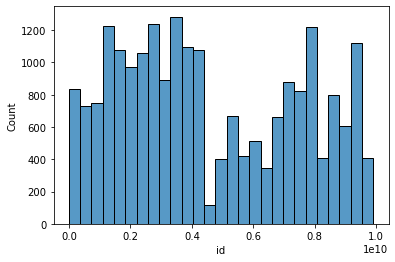

{'missing': 0,
 'min': 1000102,
 'max': 9900000190,
 'mean': 4580301520.86,
 'var': 8.274629486057814e+18,
 'std': 2876565571.31,
 'range': 9899000088,
 'q1': 2123049194.0,
 'q2': 3904930410.0,
 'q3': 7308900445.0,
 'skewness': 0.24,
 'kurtosis': -1.26}

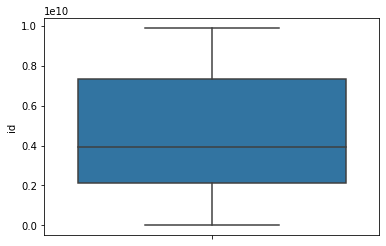

In [14]:
univariate_num(data=df, x="id")

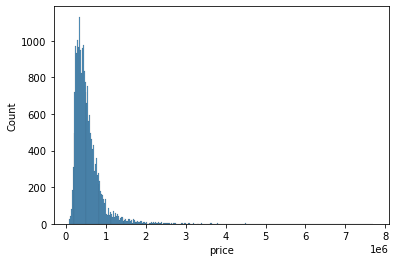

{'missing': 0,
 'min': 75000.0,
 'max': 7700000.0,
 'mean': 540088.14,
 'var': 134782378397.25,
 'std': 367127.2,
 'range': 7625000.0,
 'q1': 321950.0,
 'q2': 450000.0,
 'q3': 645000.0,
 'skewness': 4.02,
 'kurtosis': 34.59}

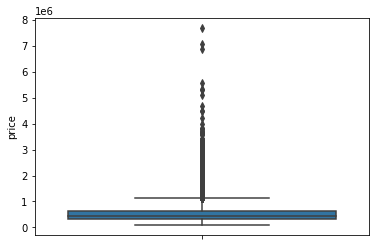

In [15]:
univariate_num(data=df, x="price")

Price
* no missing values
* minimum house price is 75000 and max is 7700000
* avg house price is  540088.14
* Outliers in price (column)

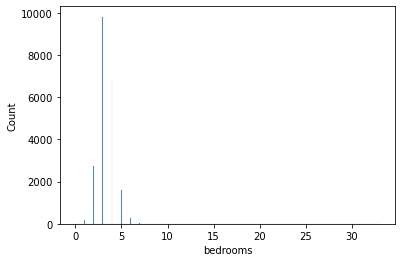

{'missing': 0,
 'min': 0,
 'max': 33,
 'mean': 3.37,
 'var': 0.87,
 'std': 0.93,
 'range': 33,
 'q1': 3.0,
 'q2': 3.0,
 'q3': 4.0,
 'skewness': 1.97,
 'kurtosis': 49.06}

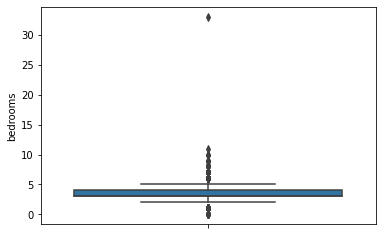

In [16]:
univariate_num(data=df, x="bedrooms")

* in bedroom column up and down both side outliers

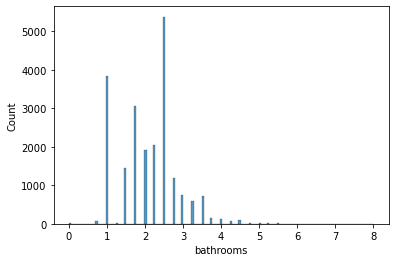

{'missing': 0,
 'min': 0.0,
 'max': 8.0,
 'mean': 2.11,
 'var': 0.59,
 'std': 0.77,
 'range': 8.0,
 'q1': 1.75,
 'q2': 2.25,
 'q3': 2.5,
 'skewness': 0.51,
 'kurtosis': 1.28}

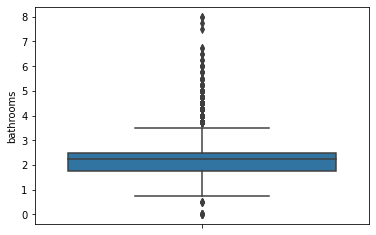

In [17]:
univariate_num(data=df, x="bathrooms")

* outliers in bathrooms column

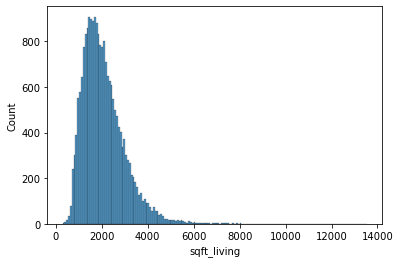

{'missing': 0,
 'min': 290,
 'max': 13540,
 'mean': 2079.9,
 'var': 843533.68,
 'std': 918.44,
 'range': 13250,
 'q1': 1427.0,
 'q2': 1910.0,
 'q3': 2550.0,
 'skewness': 1.47,
 'kurtosis': 5.24}

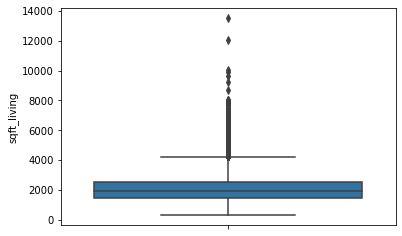

In [18]:
univariate_num(data=df, x="sqft_living")

* positive skewed 
* outliers upper side

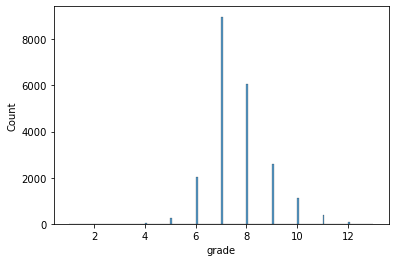

{'missing': 0,
 'min': 1,
 'max': 13,
 'mean': 7.66,
 'var': 1.38,
 'std': 1.18,
 'range': 12,
 'q1': 7.0,
 'q2': 7.0,
 'q3': 8.0,
 'skewness': 0.77,
 'kurtosis': 1.19}

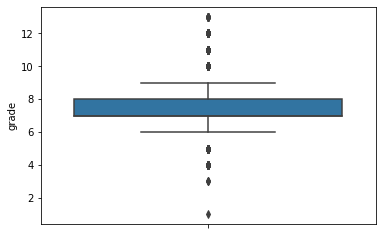

In [19]:
univariate_num(data=df, x="grade")

#### Bivariate Analysis
* cat-cat
* cat-num/num-cat
* num-num

In [20]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_yr
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,13
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,13
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,18


* Price does not even depend on id so we can drop 

  and also lat , long , zipcode not depend on price
  
* we uses house_yr old so we can drop yr_built

In [21]:
df.drop(columns=["lat", "long", "zipcode", "id"], inplace=True)

In [22]:
df.drop(columns=["yr_built"], inplace=True)

In [23]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_yr
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,67
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,71
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,89
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,57
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,0,1530,1509,13
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,0,1830,7200,8
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,0,1020,2007,13
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,0,1410,1287,18


<AxesSubplot:xlabel='grade', ylabel='price'>

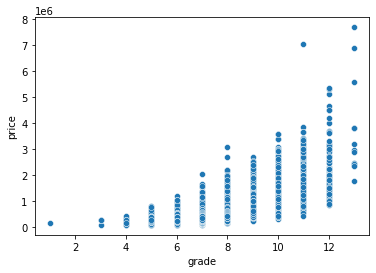

In [24]:
sns.scatterplot(data=df, x=df["grade"], y=df["price"])

* We see when grade increase price also increase 


<AxesSubplot:xlabel='house_yr', ylabel='price'>

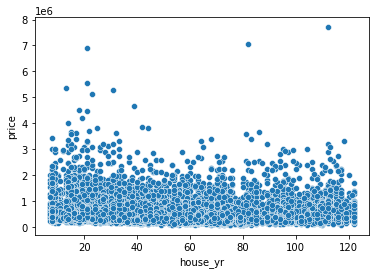

In [25]:
sns.scatterplot(data=df, x=df["house_yr"], y=df["price"])

* we see new house price is high 

<AxesSubplot:xlabel='condition', ylabel='price'>

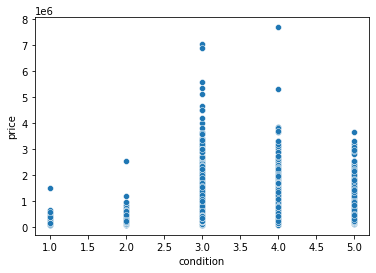

In [26]:
sns.scatterplot(data=df, x=df["condition"], y=df["price"])

## Outliers treatment

In [27]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
price,21613.0,540088.141767,367127.196483,75000.0,153500.36,175000.00,191342.00,202344.00,210000.0,321950.00,450000.00,645000.0,887000.0,1156480.0,1259040.00,1388000.00,1600000.00,1964400.00,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,2.00,2.00,2.00,2.00,2.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,6.00,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.00,1.00,1.00,1.00,1.0,1.75,2.25,2.5,3.0,3.5,3.50,3.50,3.75,4.25,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,720.00,790.00,840.00,900.00,940.0,1427.00,1910.00,2550.0,3250.0,3760.0,3920.00,4140.00,4410.00,4978.80,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,1013.12,1184.00,1305.36,1489.48,1800.0,5040.00,7618.00,10688.0,21397.6,43339.2,50658.16,67436.84,107157.00,213008.00,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.50,2.0,2.0,2.0,2.00,2.50,3.00,3.00,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,2.0,2.00,3.00,3.00,4.00,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,3.00,3.00,3.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,5.00,5.0
grade,21613.0,7.656873,1.175459,1.0,5.00,6.00,6.00,6.00,6.0,7.00,7.00,8.0,9.0,10.0,10.00,10.00,11.00,11.00,13.0


In [28]:
df_out=[ "price", "sqft_living", "sqft_lot", "sqft_above", 
"sqft_basement",  "sqft_lot15", "sqft_living15", "bedrooms", "bathrooms", "grade"]

In [29]:
df_not_out=df.drop(columns=["bedrooms", "bathrooms", "price", "sqft_living", "sqft_lot", "grade", "sqft_above", 
"sqft_basement",  "sqft_lot15", "sqft_living15"])

In [30]:
df1_out=df[df_out]


In [31]:
df1_out

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_lot15,sqft_living15,bedrooms,bathrooms,grade
0,221900.0,1180,5650,1180,0,5650,1340,3,1.00,7
1,538000.0,2570,7242,2170,400,7639,1690,3,2.25,7
2,180000.0,770,10000,770,0,8062,2720,2,1.00,6
3,604000.0,1960,5000,1050,910,5000,1360,4,3.00,7
4,510000.0,1680,8080,1680,0,7503,1800,3,2.00,8
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,1131,1530,0,1509,1530,3,2.50,8
21609,400000.0,2310,5813,2310,0,7200,1830,4,2.50,8
21610,402101.0,1020,1350,1020,0,2007,1020,2,0.75,7
21611,400000.0,1600,2388,1600,0,1287,1410,3,2.50,8


#### For outliers treatment we use capping maethod
----------------------------------------------------------------------_

In [32]:
### Outlier Capping Function - Method -1
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [33]:
df1=df1_out.apply(outliers_percentile)

In [34]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
price,21613.0,532888.126735,317438.089268,153500.36,153500.6768,175000.00,191342.00,202344.00,210000.0,321950.00,450000.00,645000.0,887000.0,1156480.0,1259040.00,1388000.00,1600000.00,1963872.000,1964400.00
sqft_living,21613.0,2070.894721,872.755768,720.00,720.0000,790.00,840.00,900.00,940.0,1427.00,1910.00,2550.0,3250.0,3760.0,3920.00,4140.00,4410.00,4977.744,4978.80
sqft_lot,21613.0,13985.009996,27703.147345,1013.12,1013.2256,1184.00,1305.36,1489.48,1800.0,5040.00,7618.00,10688.0,21397.6,43339.2,50658.16,67436.84,107157.00,213008.000,213008.00
sqft_above,21613.0,1781.797529,795.135471,700.00,700.0000,750.00,790.00,820.00,850.0,1190.00,1560.00,2210.0,2950.0,3400.0,3520.00,3700.00,3970.00,4370.000,4370.00
sqft_basement,21613.0,288.171008,429.005284,0.00,0.0000,0.00,0.00,0.00,0.0,0.00,0.00,560.0,970.0,1190.0,1250.00,1340.00,1450.00,1660.000,1660.00
sqft_lot15,21613.0,12004.317822,19872.532922,1191.24,1191.4512,1296.24,1426.36,1670.96,1999.2,5100.00,7620.00,10083.0,17852.4,37062.8,42654.44,51400.00,80188.28,157687.000,157687.00
sqft_living15,21613.0,1982.897238,666.839300,950.00,950.0000,1020.00,1060.00,1100.00,1140.0,1490.00,1840.00,2360.0,2930.0,3300.0,3420.00,3560.00,3767.60,4080.000,4080.00
bedrooms,21613.0,3.375422,0.866261,2.00,2.0000,2.00,2.00,2.00,2.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,6.000,6.00
bathrooms,21613.0,2.110501,0.746825,1.00,1.0000,1.00,1.00,1.00,1.0,1.75,2.25,2.5,3.0,3.5,3.50,3.50,3.75,4.250,4.25
grade,21613.0,7.653311,1.151958,5.00,5.0000,6.00,6.00,6.00,6.0,7.00,7.00,8.0,9.0,10.0,10.00,10.00,11.00,11.000,11.00


In [35]:
df2=pd.concat([df1, df_not_out], axis=1)

* we merge outliers treatment columns and non outliers 

In [36]:
df2

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_lot15,sqft_living15,bedrooms,bathrooms,grade,floors,waterfront,view,condition,yr_renovated,house_yr
0,221900.0,1180.0,5650.0,1180.0,0.0,5650.0,1340.0,3.0,1.00,7.0,1.0,0,0,3,0,67
1,538000.0,2570.0,7242.0,2170.0,400.0,7639.0,1690.0,3.0,2.25,7.0,2.0,0,0,3,1991,71
2,180000.0,770.0,10000.0,770.0,0.0,8062.0,2720.0,2.0,1.00,6.0,1.0,0,0,3,0,89
3,604000.0,1960.0,5000.0,1050.0,910.0,5000.0,1360.0,4.0,3.00,7.0,1.0,0,0,5,0,57
4,510000.0,1680.0,8080.0,1680.0,0.0,7503.0,1800.0,3.0,2.00,8.0,1.0,0,0,3,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530.0,1131.0,1530.0,0.0,1509.0,1530.0,3.0,2.50,8.0,3.0,0,0,3,0,13
21609,400000.0,2310.0,5813.0,2310.0,0.0,7200.0,1830.0,4.0,2.50,8.0,2.0,0,0,3,0,8
21610,402101.0,1020.0,1350.0,1020.0,0.0,2007.0,1020.0,2.0,1.00,7.0,2.0,0,0,3,0,13
21611,400000.0,1600.0,2388.0,1600.0,0.0,1287.0,1410.0,3.0,2.50,8.0,2.0,0,0,3,0,18


In [37]:
df2.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
price,21613.0,532888.126735,317438.089268,153500.36,153500.6768,175000.00,191342.00,202344.00,210000.0,321950.00,450000.00,645000.0,887000.0,1156480.0,1259040.00,1388000.00,1600000.00,1963872.000,1964400.00
sqft_living,21613.0,2070.894721,872.755768,720.00,720.0000,790.00,840.00,900.00,940.0,1427.00,1910.00,2550.0,3250.0,3760.0,3920.00,4140.00,4410.00,4977.744,4978.80
sqft_lot,21613.0,13985.009996,27703.147345,1013.12,1013.2256,1184.00,1305.36,1489.48,1800.0,5040.00,7618.00,10688.0,21397.6,43339.2,50658.16,67436.84,107157.00,213008.000,213008.00
sqft_above,21613.0,1781.797529,795.135471,700.00,700.0000,750.00,790.00,820.00,850.0,1190.00,1560.00,2210.0,2950.0,3400.0,3520.00,3700.00,3970.00,4370.000,4370.00
sqft_basement,21613.0,288.171008,429.005284,0.00,0.0000,0.00,0.00,0.00,0.0,0.00,0.00,560.0,970.0,1190.0,1250.00,1340.00,1450.00,1660.000,1660.00
sqft_lot15,21613.0,12004.317822,19872.532922,1191.24,1191.4512,1296.24,1426.36,1670.96,1999.2,5100.00,7620.00,10083.0,17852.4,37062.8,42654.44,51400.00,80188.28,157687.000,157687.00
sqft_living15,21613.0,1982.897238,666.839300,950.00,950.0000,1020.00,1060.00,1100.00,1140.0,1490.00,1840.00,2360.0,2930.0,3300.0,3420.00,3560.00,3767.60,4080.000,4080.00
bedrooms,21613.0,3.375422,0.866261,2.00,2.0000,2.00,2.00,2.00,2.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,6.000,6.00
bathrooms,21613.0,2.110501,0.746825,1.00,1.0000,1.00,1.00,1.00,1.0,1.75,2.25,2.5,3.0,3.5,3.50,3.50,3.75,4.250,4.25
grade,21613.0,7.653311,1.151958,5.00,5.0000,6.00,6.00,6.00,6.0,7.00,7.00,8.0,9.0,10.0,10.00,10.00,11.00,11.000,11.00


## Multicollinearility

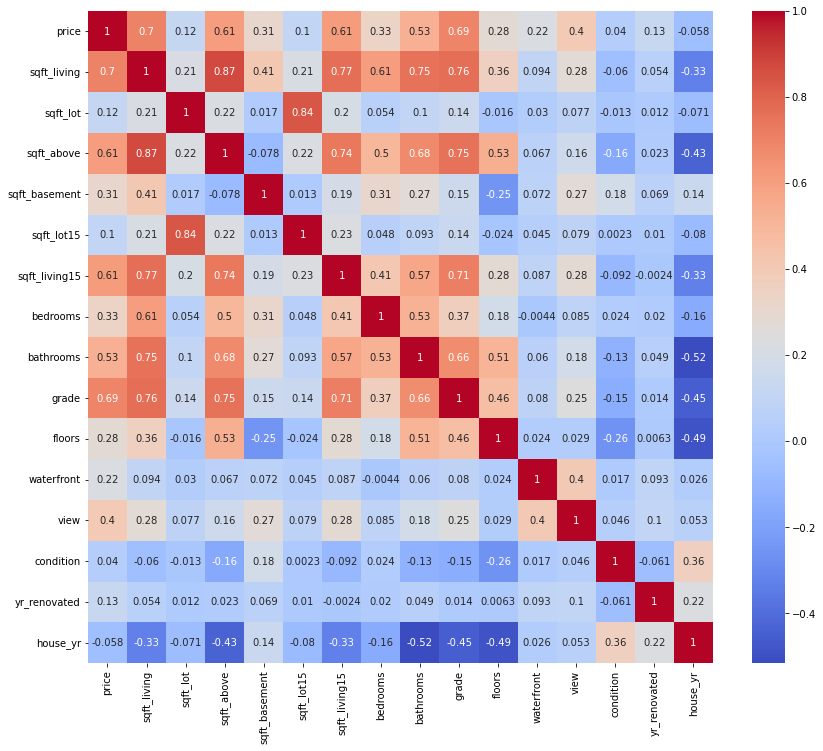

In [38]:
cr=df2.corr()
cr
plt.figure(figsize=(14,12))
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

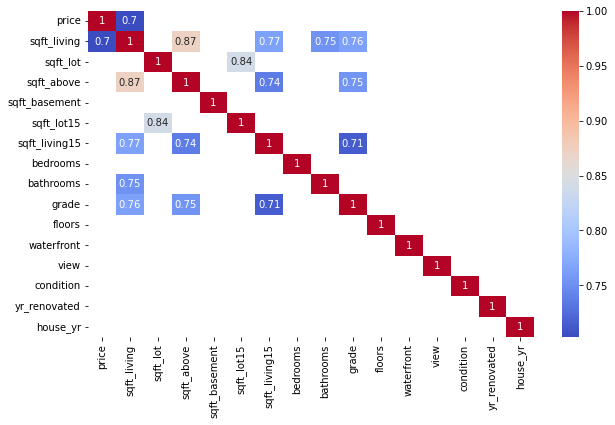

In [39]:
cr1=cr[abs(cr)>.7]

plt.figure(figsize=(10,6))
sns.heatmap(cr1, annot=True, cmap="coolwarm")
plt.show()                                                #annot = show numbers in graaph

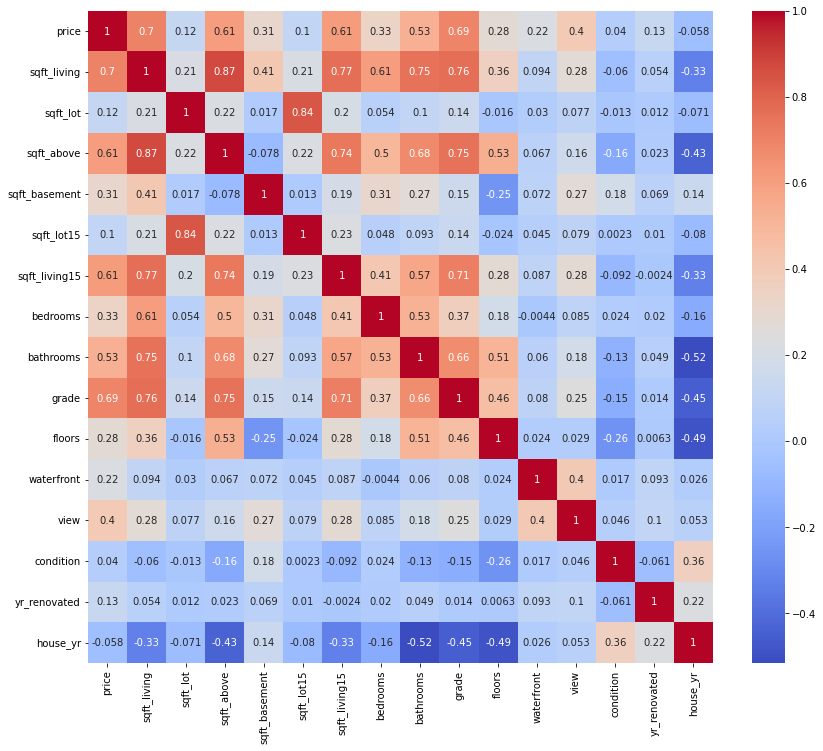

In [40]:
cr=df2.corr()
cr
plt.figure(figsize=(14,12))
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

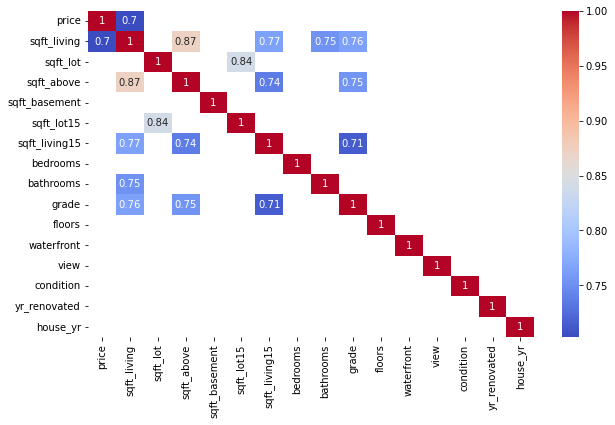

In [41]:
cr2=cr[abs(cr)>.7]

plt.figure(figsize=(10,6))
sns.heatmap(cr2, annot=True, cmap="coolwarm")
plt.show()                                                #annot = show numbers in graaph

In [42]:
df2.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_lot15', 'sqft_living15', 'bedrooms', 'bathrooms', 'grade',
       'floors', 'waterfront', 'view', 'condition', 'yr_renovated',
       'house_yr'],
      dtype='object')

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df2[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_lot15', 'sqft_living15', 'bedrooms', 'bathrooms', 'grade',
       'floors', 'waterfront', 'view', 'condition', 'yr_renovated',
       'house_yr']]          

vif_data=pd.DataFrame()
vif_data["feature"]=X.columns

# calculating vif for each feature

vif_data["VIF"]=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]

vif_data.sort_values(by=["VIF"])

,feature,VIF
13,yr_renovated,1.195174
10,waterfront,1.212348
11,view,1.502065
1,sqft_lot,4.301330
4,sqft_lot15,4.719083
14,house_yr,7.225732
9,floors,16.510193
6,bedrooms,25.191403
5,sqft_living15,28.688280
12,condition,29.236860


* vif is very high in sqft_living,  sqft_above so we can drop that columns

In [44]:
df2.drop(columns=[ "sqft_above", "sqft_living", "sqft_lot" ], inplace=True)

In [45]:
df2.columns

Index(['price', 'sqft_basement', 'sqft_lot15', 'sqft_living15', 'bedrooms',
       'bathrooms', 'grade', 'floors', 'waterfront', 'view', 'condition',
       'yr_renovated', 'house_yr'],
      dtype='object')

## Normality check

In [46]:
from scipy.stats import jarque_bera

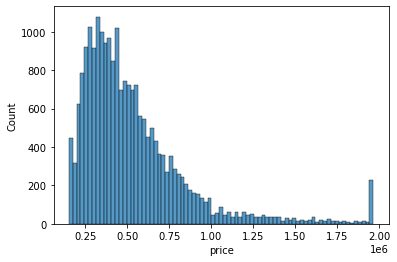

In [47]:
sns.histplot(df2["price"])
plt.show()

In [48]:
jarque_bera(df2["price"])

Jarque_beraResult(statistic=41724.37424381912, pvalue=0.0)

<AxesSubplot:xlabel='price', ylabel='Count'>

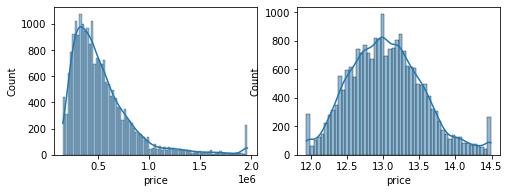

In [49]:
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.histplot(df2["price"], kde=True)         # first row second columns and 3 position (121)
plt.subplot(222)
sns.histplot(np.log1p(df2["price"]), kde=True)

In [50]:
jarque_bera((df2["price"]))

Jarque_beraResult(statistic=41724.37424381912, pvalue=0.0)

## Model dev practise

In [76]:
x=df2[[ 'sqft_basement', 'sqft_lot15', 'sqft_living15', 'bedrooms',
       'bathrooms', 'grade', 'floors', 'waterfront', 'view', 'condition',
       'yr_renovated', 'house_yr']]
y=df2["price"]

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [81]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [83]:
print(" Train R2 score : ", reg.score(x_train, y_train))

 Train R2 score :  0.6577470624554909


In [84]:
print(" Test R2 score : ", reg.score(x_test, y_test))

 Test R2 score :  0.6570530855124637


In [85]:
reg.coef_

array([ 6.99051369e+01, -2.14167084e-01,  9.61193291e+01, -7.28881511e+03,
        6.66083081e+04,  1.42125793e+05,  5.46300416e+04,  3.58469910e+05,
        3.99460560e+04,  1.99137226e+04,  1.41420070e+01,  3.48956895e+03])

In [87]:
reg.intercept_

-1219300.1980197746

In [89]:
pred_train=reg.predict(x_train)
pred_train

array([ 88774.12392248, 414774.15111162, 596084.53911477, ...,
       734023.29374727, 562894.58880632, 494683.68037315])

In [90]:
pred_test=reg.predict(x_test)
pred_test

array([ 301903.82969379, 1222335.53583833,  473123.83680786, ...,
        859365.12344245,  258231.30702413,  465689.47001852])

In [91]:
y_train=(y_train)
y_train

1956      420850.0
15678     335000.0
8729      587100.0
19064     495000.0
11291     780000.0
           ...    
13123    1180000.0
19648     299000.0
9845      431000.0
10799     411000.0
2732      699900.0
Name: price, Length: 16209, dtype: float64

In [177]:
y_test=(y_test)
y_test

17384     297000.0
722      1578000.0
2680      562100.0
18754     631500.0
14554     780000.0
           ...    
8709      649990.0
12346     390000.0
10458     774950.0
10894     372500.0
15647     599995.0
Name: price, Length: 5404, dtype: float64

In [178]:
print("train MSE : ", (np.mean((pred_train-y_train)**(2))))
print("train rmse :", (np.mean((pred_train-y_train)**(2)))**(1/2))
print("train MAE : ",  np.mean(np.abs(pred_train-y_train)))
print("train MAPE: ", np.mean(np.abs((pred_train-y_train)/y_train)))

train MSE :  34662886590.671295
train rmse : 186179.71584109613
train MAE :  132192.3513468326
train MAPE:  0.2829230650525299


In [179]:
print("test MSE : ", (np.mean((pred_test-y_test)**(2))))
print("test rmse :", (np.mean((pred_test-y_test)**(2)))**(1/2))
print("test MAE : ",  np.mean(np.abs(pred_test-y_test)))
print("train MAPE: ", np.mean(np.abs((pred_test-y_test)/y_test)))

test MSE :  34014886868.77309
test rmse : 184431.25241881618
test MAE :  130278.4250614368
train MAPE:  0.28144917114632045


In [180]:
gh=pd.DataFrame({"ACT" : y_train, "pred": pred_train})

<AxesSubplot:>

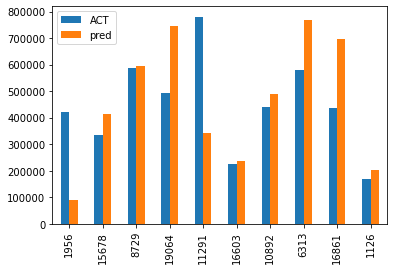

In [181]:
gh.head(10).plot(kind="bar")

## SGD

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
mn=MinMaxScaler()
mn.fit(x_train)

MinMaxScaler()

In [188]:
x_train_trans=mn.transform(x_train)
x_test_trans=mn.transform(x_test)

In [189]:
x_train_trans_df=pd.DataFrame(x_train_trans, columns=x_train.columns)
x_train_trans_df.head(2)

,sqft_basement,sqft_lot15,sqft_living15,bedrooms,bathrooms,grade,floors,waterfront,view,condition,yr_renovated,house_yr
0,0.0,0.122424,0.118211,0.00,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.608696
1,0.0,0.056524,0.182109,0.25,0.230769,0.333333,0.0,0.0,0.0,0.5,0.980645,0.582609


In [190]:
from sklearn.linear_model import SGDRegressor

In [191]:
sgd=SGDRegressor(loss="squared_error", epsilon=0.01, penalty="l1", max_iter=100000, tol=1e-7, random_state=0)

In [192]:
sgd=SGDRegressor(loss="squared_error" , epsilon=0.01, penalty="l1" ,max_iter=100000000 ,tol=1e-7, random_state=0)

In [193]:
sgd.fit(x_train_trans, y_train)

SGDRegressor(epsilon=0.01, max_iter=100000000, penalty='l1', random_state=0,
             tol=1e-07)

In [194]:
sgd.fit(x_test_trans, y_test)

SGDRegressor(epsilon=0.01, max_iter=100000000, penalty='l1', random_state=0,
             tol=1e-07)

In [195]:
sgd.score(x_train_trans, y_train)

0.6559690378174171

In [196]:
sgd.score(x_test_trans, y_test)

0.6579850966734666

## Model development

In [51]:
df2.columns

Index(['price', 'sqft_basement', 'sqft_lot15', 'sqft_living15', 'bedrooms',
       'bathrooms', 'grade', 'floors', 'waterfront', 'view', 'condition',
       'yr_renovated', 'house_yr'],
      dtype='object')

In [52]:
x=df2[[ 'sqft_basement', 'sqft_lot15', 'sqft_living15', 'bedrooms',
       'bathrooms', 'grade', 'floors', 'waterfront', 'view', 'condition',
       'yr_renovated', 'house_yr']]
y=df2["price"]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics


In [54]:
x_train, x_test, y_train, y_test=train_test_split(x, y , test_size=.25, random_state=0)

In [55]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [56]:
reg.coef_

array([ 6.99051369e+01, -2.14167084e-01,  9.61193291e+01, -7.28881511e+03,
        6.66083081e+04,  1.42125793e+05,  5.46300416e+04,  3.58469910e+05,
        3.99460560e+04,  1.99137226e+04,  1.41420070e+01,  3.48956895e+03])

In [57]:
print("train R^2 : ",  reg.score(x_train, y_train))

train R^2 :  0.6577470624554909


In [58]:
print("train R^2 : ",  reg.score(x_test, y_test))

train R^2 :  0.6570530855124637


In [59]:
pred_train=(reg.predict(x_train))
pred_train                                        #for predict values find

array([ 88774.12392248, 414774.15111162, 596084.53911477, ...,
       734023.29374727, 562894.58880632, 494683.68037315])

In [60]:
pred_test=(reg.predict(x_test))
pred_test

array([ 301903.82969379, 1222335.53583833,  473123.83680786, ...,
        859365.12344245,  258231.30702413,  465689.47001852])

In [61]:
y_train=(y_train)
y_train

1956      420850.0
15678     335000.0
8729      587100.0
19064     495000.0
11291     780000.0
           ...    
13123    1180000.0
19648     299000.0
9845      431000.0
10799     411000.0
2732      699900.0
Name: price, Length: 16209, dtype: float64

In [62]:
y_test=(y_test)

In [63]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 34662886590.671295
Train rmse 186179.71584109613
Train MAE 132192.3513468326
Train MAPE 0.2829230650525299


In [64]:
  print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 34014886868.77309
Test rmse 184431.25241881618
Test MAE 130278.4250614368
Test MAPE 0.28144917114632045


In [65]:
gh=pd.DataFrame({'Y_act':y_train, 'Y_pred': pred_train})

<AxesSubplot:>

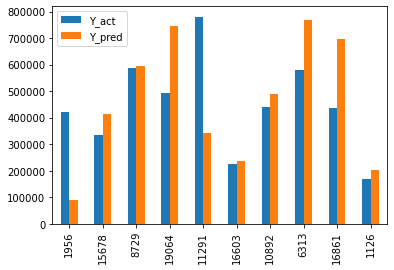

In [66]:
gh.head(10).plot(kind='bar')

# SGD

In [67]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
mn.fit(x_train)

MinMaxScaler()

In [68]:
x_train_trans=mn.transform(x_train)
x_test_trans=mn.transform(x_test)

In [69]:
x_train_trans_df=pd.DataFrame(x_train_trans,columns=x_train.columns)
x_train_trans_df.head(2)

,sqft_basement,sqft_lot15,sqft_living15,bedrooms,bathrooms,grade,floors,waterfront,view,condition,yr_renovated,house_yr
0,0.0,0.122424,0.118211,0.00,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.608696
1,0.0,0.056524,0.182109,0.25,0.230769,0.333333,0.0,0.0,0.0,0.5,0.980645,0.582609


In [70]:
from sklearn.linear_model import  SGDRegressor

In [171]:
sgd=SGDRegressor(loss="squared_error" , epsilon=0.01, penalty="l1" ,max_iter=100000000 ,tol=1e-7, random_state=0)

In [170]:
sgd.fit(x_train_trans, y_train)

SGDRegressor(epsilon=0.01, max_iter=100000000, penalty='l1', random_state=0,
             tol=1e-07)

In [73]:
sgd.fit(x_test_trans,y_test)

SGDRegressor(epsilon=0.01, max_iter=100000000, penalty='l1', random_state=0,
             tol=1e-07)

In [74]:
sgd.score(x_train_trans,y_train)

0.6559690378174171

In [75]:
sgd.score(x_test_trans,y_test)

0.6579850966734666